<a href="https://colab.research.google.com/github/zealpatel1990/KDM_spring_2021_class/blob/main/ICP%2012/source_code/ICP12_LSTM_zeal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance yahoofinancials

  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
#all import

import numpy as np
import pandas as pd
import yfinance as yf
from yahoofinancials import YahooFinancials
import datetime as dt
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


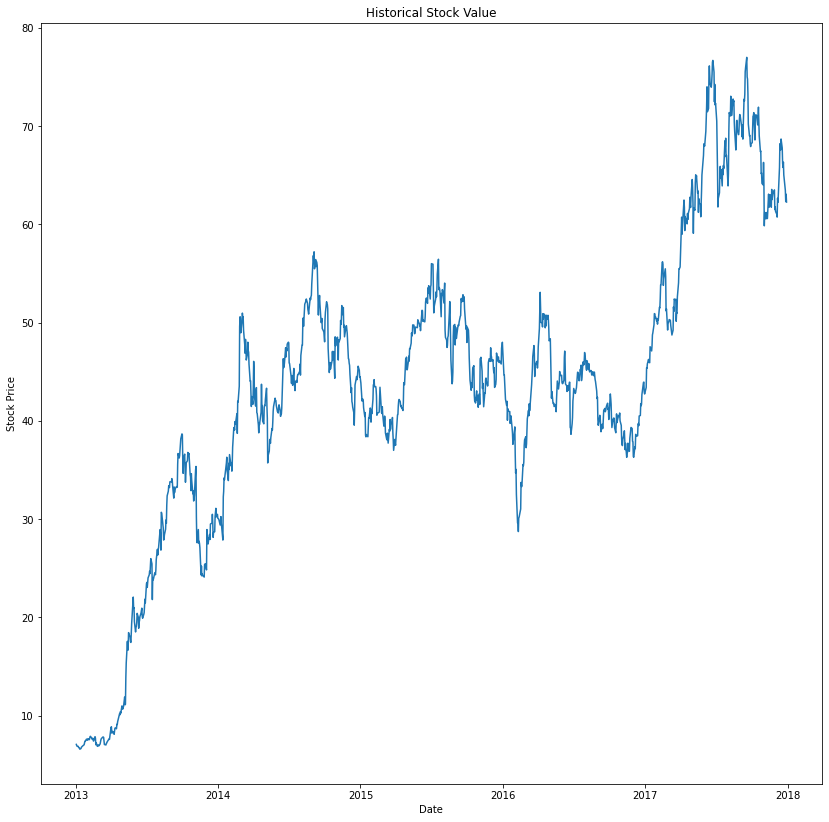

In [ ]:
#Here set stock training start and end date

raw_data = yf.download('TSLA',
                      start='2013-1-1',
                      end='2017-12-31', 
                      progress=False)

#plotting
plt.figure(figsize=(14,14))
plt.plot(raw_data['Close'])
plt.title('Historical Stock Value')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()


In [ ]:

#preprocessing
raw_data['Date'] = raw_data.index
req_data = pd.DataFrame(columns = ['Date', 'Open', 'High', 'Low', 'Close'])
req_data['Date'] = raw_data['Date']
req_data['Open'] = raw_data['Open']
req_data['High'] = raw_data['High']
req_data['Low'] = raw_data['Low']
req_data['Close'] = raw_data['Close']

In [ ]:
train_set = req_data.iloc[:, 1:2].values
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(train_set)
X_train = []
y_train = []
for i in range(60, 1259):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0]) 
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


In [ ]:
X_train.shape

(1199, 60, 1)

In [ ]:

#LSTM Recurrent Model
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
model.add(Dense(units = 1))


In [ ]:

#fitting the model
model.compile(optimizer = 'sgd', loss = 'mean_squared_error')
model.fit(X_train, y_train, epochs = 15, batch_size = 16)



Epoch 1/15
75/75 [==============================] - 35s 15ms/step - loss: 0.1088
Epoch 2/15
75/75 [==============================] - 1s 14ms/step - loss: 0.0295
Epoch 3/15
75/75 [==============================] - 1s 14ms/step - loss: 0.0259
Epoch 4/15
75/75 [==============================] - 1s 14ms/step - loss: 0.0228
Epoch 5/15
75/75 [==============================] - 1s 14ms/step - loss: 0.0200
Epoch 6/15
75/75 [==============================] - 1s 14ms/step - loss: 0.0150
Epoch 7/15
75/75 [==============================] - 1s 14ms/step - loss: 0.0096
Epoch 8/15
75/75 [==============================] - 1s 14ms/step - loss: 0.0089
Epoch 9/15
75/75 [==============================] - 1s 14ms/step - loss: 0.0075
Epoch 10/15
75/75 [==============================] - 1s 14ms/step - loss: 0.0067
Epoch 11/15
75/75 [==============================] - 1s 14ms/step - loss: 0.0062
Epoch 12/15
75/75 [==============================] - 1s 14ms/step - loss: 0.0062
Epoch 13/15
75/75 [=================

In [ ]:

#Fetching the test data and preprocessing
#test_raw_data = gh(symbol='SBIN',start=dt.datetime(2019,1,1),end=dt.datetime(2019,9,18))
test_raw_data = yf.download('TSLA',
                      start='2018-1-1',
                      end='2019-1-1', 
                      progress=False)

test_raw_data['Date'] = test_raw_data.index
test_data = pd.DataFrame(columns = ['Date', 'Open', 'High', 'Low', 'Close'])
test_data['Date'] = test_raw_data['Date']
test_data['Open'] = test_raw_data['Open']
test_data['High'] = test_raw_data['High']
test_data['Low'] = test_raw_data['Low']
test_data['Close'] = test_raw_data['Close']
real_stock_price = test_data.iloc[:, 4:5].values
dataset_total = pd.concat((req_data['Open'], test_data['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(test_data) - 60:].values
inputs = sc.transform(inputs.reshape(-1,1))
X_test = []
for i in range(60, 300):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))



In [ ]:
X_test.shape

(240, 60, 1)

In [ ]:

#predicting
prediction = model.predict(X_test)
prediction = sc.inverse_transform(prediction)


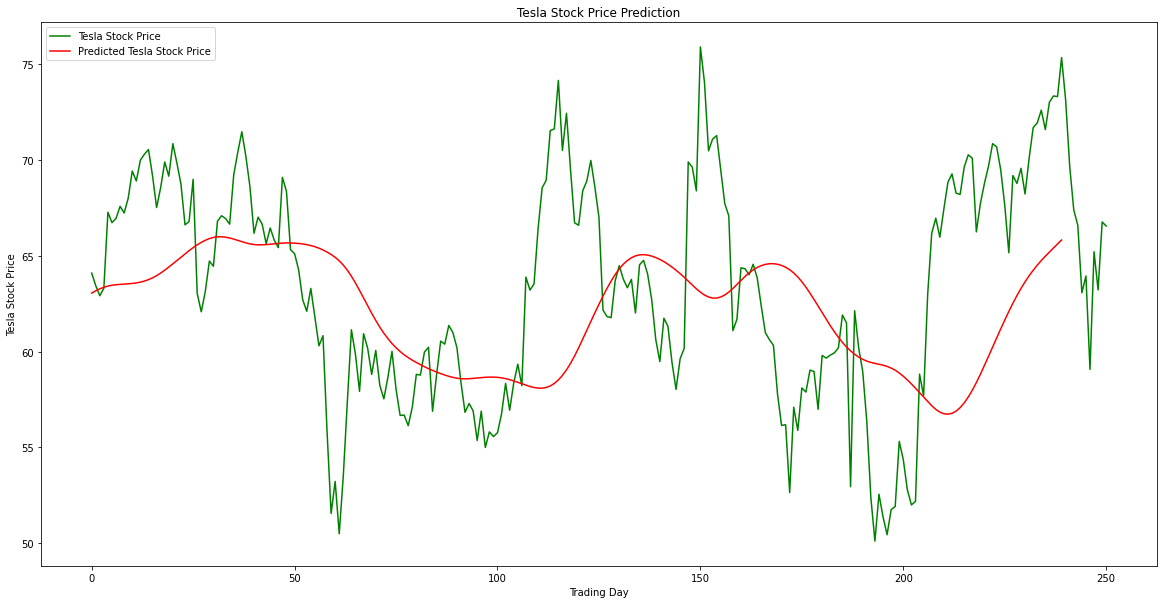

In [ ]:

#Plotting
plt.figure(figsize=(20,10))
plt.plot(real_stock_price, color = 'green', label = 'Tesla Stock Price')
plt.plot(prediction, color = 'red', label = 'Predicted Tesla Stock Price')
plt.title('Tesla Stock Price Prediction')
plt.xlabel('Trading Day')
plt.ylabel('Tesla Stock Price')
plt.legend()
plt.show()